In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from ray.tune import ExperimentAnalysis

notebook_path = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_path, '..')))

from utils.constants import TRAIN_RESULTS_PATH
%matplotlib inline

## Testing Stats

In [ ]:
df6eab = pd.read_csv('/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/6/tests/eab_sim/states.csv')
df12eab = pd.read_csv("/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/12/tests/eab_sim/states.csv")
df18eab = pd.read_csv("/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/18/tests/eab_sim/states.csv")

In [ ]:
df6msb = pd.read_csv('/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/6/tests/msb_sim/states.csv')
df12msb = pd.read_csv("/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/12/tests/msb_sim/states.csv")
df18msb = pd.read_csv("/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/18/tests/msb_sim/states.csv")

In [ ]:
df6mso = pd.read_csv('/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/6/tests/gko_sim/states.csv')
df12mso = pd.read_csv("/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/12/tests/gko_sim/states.csv")
df18mso = pd.read_csv("/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/18/tests/gko_sim/states.csv")

In [5]:
np.mean(df6eab['mean_accuracy']), np.mean(df6msb['mean_accuracy']), np.mean(df6mso['mean_accuracy']), np.mean(df12eab['mean_accuracy']), np.mean(df12msb['mean_accuracy'])

(42.366666666666696,
 43.633333333333354,
 39.83333333333332,
 42.366666666666696,
 43.633333333333354)

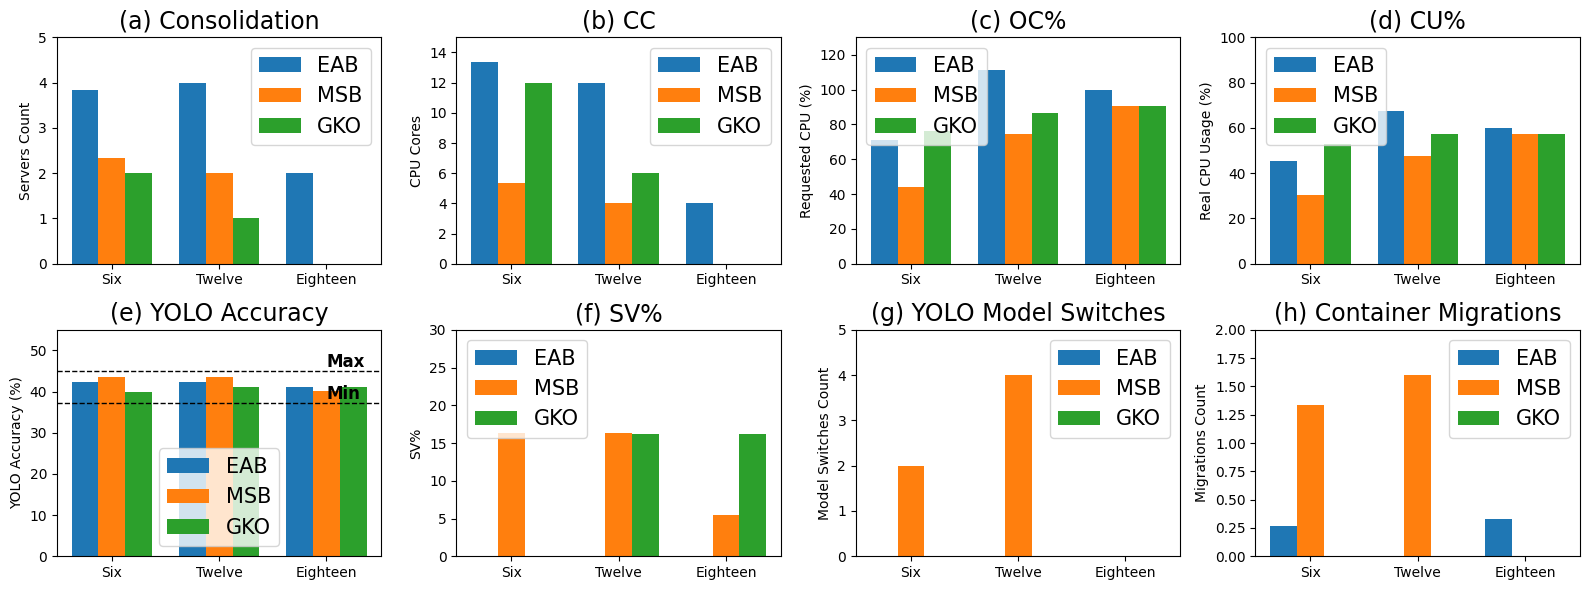

In [17]:
# Specify the columns to plot
columns_to_plot = [
    'num_consolidated', 
    'cpu_conserved_cost',
    'oversub_cores',
    'mean_cluster_cpu_util',
    'mean_accuracy',
    'num_slav',
    'num_model_switches',
    'num_moves'
]

# Create custom titles and labels
custom_titles = [
    '(a) Consolidation',
    '(b) CC',
    '(c) OC%',
    '(d) CU%',
    '(e) YOLO Accuracy',
    '(f) SV%',
    '(g) YOLO Model Switches',
    '(h) Container Migrations'
]

custom_y_labels = [
    'Servers Count',
    'CPU Cores',
    'Requested CPU (%)',
    'Real CPU Usage (%)',
    'YOLO Accuracy (%)',
    'SV%',
    'Model Switches Count',
    'Migrations Count'
]

custom_y_limits = [
    (0, 5),    # For 'num_consolidated'
    (0,15),     # For 'cpu_conserved_cost'
    (0, 130),    # For 'oversub_cores'
    (0, 100),    # For 'mean_cluster_cpu_util'
    (0, 55),    # For 'mean_accuracy'
    (0, 30),    # For 'num_slav'
    (0, 5),     # For 'num_model_switches'
    (0, 2)      # For 'num_moves'
]

custom_x_labels = [
    'Six',
    'Twelve',
    'Eighteen'
]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 6))  # 2 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

columns_to_multiply = ['oversub_cores', 'mean_cluster_cpu_util', 'num_slav']


offset = 0.25  # Offset to position the bars side-by-side
bar_width = 0.25

for i, column in enumerate(columns_to_plot):
    # Create bar positions
    x = np.arange(3)  # Only 3 DataFrames
    
    # Calculate the mean values, multiplying by 100 where necessary
    eab6 = np.mean(df6eab[column]) * (100 if column in columns_to_multiply else 1)
    eab12 = np.mean(df12eab[column]) * (100 if column in columns_to_multiply else 1)
    eab18 = np.mean(df18eab[column]) * (100 if column in columns_to_multiply else 1)

    msb6 = np.mean(df6msb[column]) * (100 if column in columns_to_multiply else 1)
    msb12 = np.mean(df12msb[column]) * (100 if column in columns_to_multiply else 1)
    msb18 = np.mean(df18msb[column]) * (100 if column in columns_to_multiply else 1)
    
    mso6 = np.mean(df6mso[column]) * (100 if column in columns_to_multiply else 1)
    mso12 = np.mean(df12mso[column]) * (100 if column in columns_to_multiply else 1)
    mso18 = np.mean(df18mso[column]) * (100 if column in columns_to_multiply else 1)


    eab_values = [eab6, eab12, eab18]
    msb_values = [msb6, msb12, msb18]
    mso_values = [mso6, mso12, mso18]
    
    # Plot bars for each group with offset positions
    axes[i].bar(x - offset, eab_values, width=bar_width, label='EAB')
    axes[i].bar(x, msb_values, width=bar_width, label='MSB')
    axes[i].bar(x + offset, mso_values, width=bar_width, label='GKO')
    
    # # Plot bars for each DataFrame
    # axes[i].bar(0, eab6, width=bar_width, label='EAB-6')
    # axes[i].bar(x[1], eab12, width=bar_width, label='EAB-12')
    # axes[i].bar(x[2], eab18, width=bar_width, label='EAB-18')
    
    # Adding custom titles and labels
    if column == 'mean_accuracy':
        axes[i].axhline(y=37.3, color='black', linestyle='--', linewidth=1)
        axes[i].axhline(y=44.9, color='black', linestyle='--', linewidth=1)
        axes[i].text(2, 37.3, 'Min', verticalalignment='bottom', horizontalalignment='left', color='black', fontsize=12, fontweight='bold')
        axes[i].text(2, 44.9, 'Max', verticalalignment='bottom', horizontalalignment='left', color='black', fontsize=12, fontweight='bold')
    axes[i].set_title(custom_titles[i], fontsize='17')
    axes[i].set_xticks(x)  # Set x-ticks to be in the center of the grouped bars
    axes[i].set_xticklabels(custom_x_labels)  # Set x-tick labels
    axes[i].set_ylabel(custom_y_labels[i])  # Set y-axis label
    axes[i].set_ylim(custom_y_limits[i])  # Apply y-limits
    axes[i].legend(fontsize='15')

# Adjust layout
plt.tight_layout()
plt.savefig('testing_results.pdf', format='pdf')
plt.show()

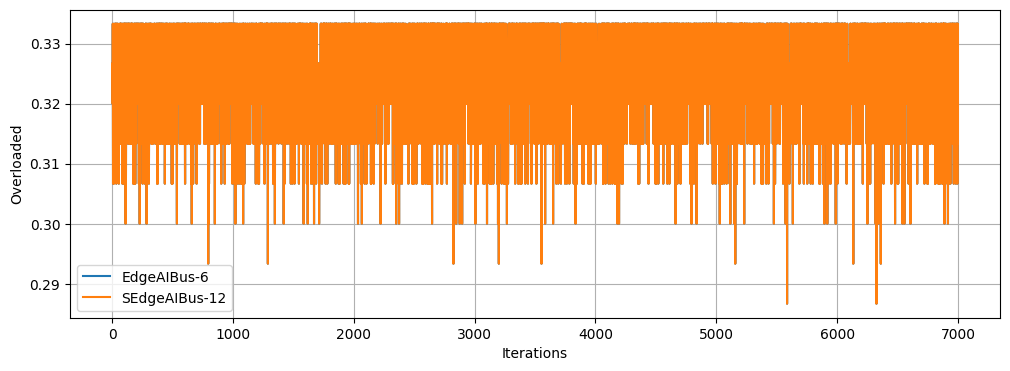

In [31]:
plt.figure(figsize=(12,4))
plt.plot(df_results6.index, df_results6['num_slav'], label='EdgeAIBus-6')
plt.plot(df_results12.index, df_results12['num_slav'], label='SEdgeAIBus-12')

#plt.title('Cost')
plt.xlabel('Iterations')
plt.ylabel('Overloaded')
plt.legend()
plt.grid(True)
#plt.ylim([0,10])
#plt.savefig('cost.pdf', format='pdf')
plt.show()

# GKE Results 

In [ ]:
dfeab_gke = pd.read_csv('/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/6/tests/eab_kube03/states.csv')
dfmsb_gke = pd.read_csv('/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/6/tests/msb_kube/states.csv')
dfgko_gke = pd.read_csv('/home/user_name/EdgeAIBus/data/testresults/IMPALA/containers/6/tests/gko_kube/states.csv')


In [19]:
np.mean(dfeab_gke['mean_accuracy']), np.mean(dfmsb_gke['mean_accuracy']), np.mean(dfgko_gke['mean_accuracy'])

(41.099999999999994, 44.45666666666666, 41.099999999999994)

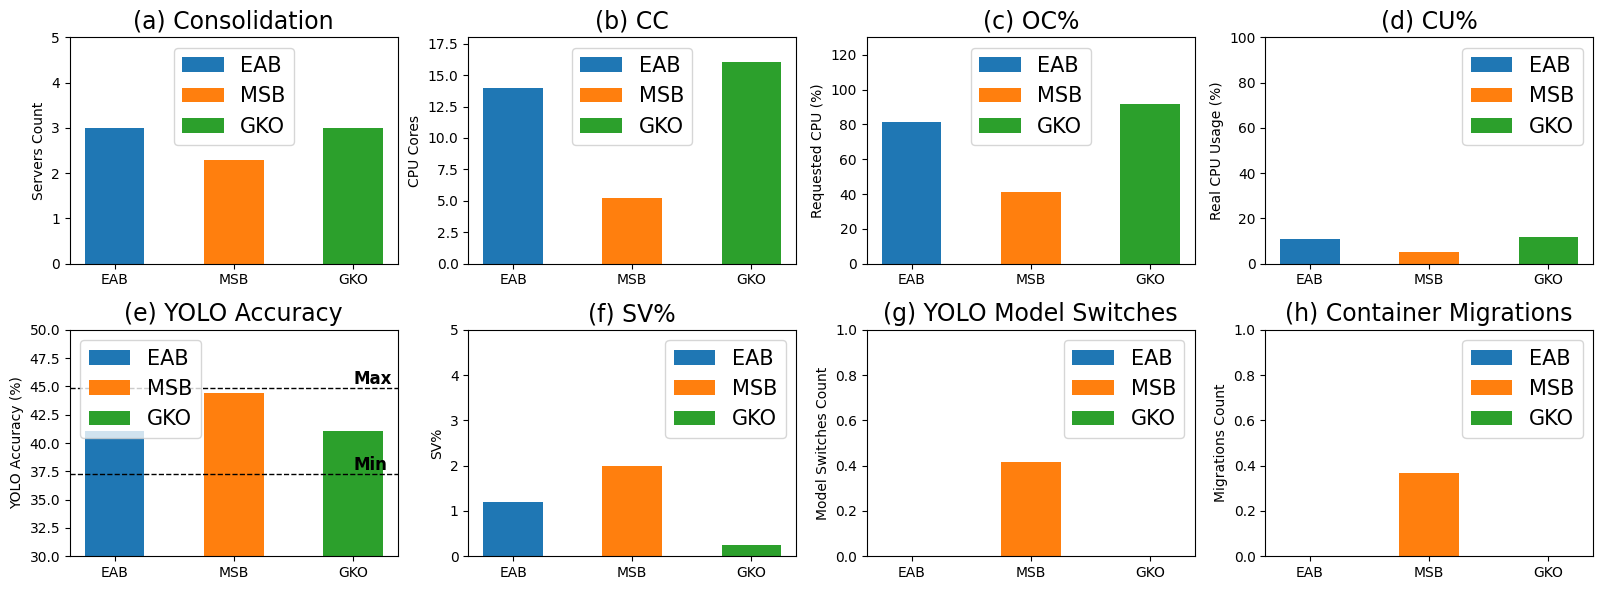

In [22]:
# Specify the columns to plot
columns_to_plot = [
    'num_consolidated', 
    'cpu_conserved_cost',
    'oversub_cores',
    'mean_cluster_cpu_util',
    'mean_accuracy',
    'num_slav',
    'num_model_switches',
    'num_moves'
]

# Create custom titles and labels
custom_titles = [
    '(a) Consolidation',
    '(b) CC',
    '(c) OC%',
    '(d) CU%',
    '(e) YOLO Accuracy',
    '(f) SV%',
    '(g) YOLO Model Switches',
    '(h) Container Migrations'
]

custom_y_labels = [
    'Servers Count',
    'CPU Cores',
    'Requested CPU (%)',
    'Real CPU Usage (%)',
    'YOLO Accuracy (%)',
    'SV%',
    'Model Switches Count',
    'Migrations Count'
]

custom_y_limits = [
    (0, 5),    # For 'num_consolidated'
    (0,18),     # For 'cpu_conserved_cost'
    (0, 130),    # For 'oversub_cores'
    (0, 100),    # For 'mean_cluster_cpu_util'
    (30, 50),    # For 'mean_accuracy'
    (0, 5),    # For 'num_slav'
    (0, 1),     # For 'num_model_switches'
    (0, 1)      # For 'num_moves'
]

custom_x_labels = [
    'EAB',
    'MSB',
    'GKO'
]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 6))  # 2 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

columns_to_multiply = ['oversub_cores', 'mean_cluster_cpu_util', 'num_slav']

for i, column in enumerate(columns_to_plot):
    # Create bar positions
    x = range(3)  # Only 3 DataFrames
    bar_width = 0.5
    
    # Calculate the mean values, multiplying by 100 where necessary
    meaneab = np.mean(dfeab_gke[column]) * (100 if column in columns_to_multiply else 1)
    meanmsb = np.mean(dfmsb_gke[column]) * (100 if column in columns_to_multiply else 1)
    meangko = np.mean(dfgko_gke[column]) * (100 if column in columns_to_multiply else 1)
    
    # Plot bars for each DataFrame
    axes[i].bar(0, meaneab, width=bar_width, label='EAB')
    axes[i].bar(x[1], meanmsb, width=bar_width, label='MSB')
    axes[i].bar(x[2], meangko, width=bar_width, label='GKO')
    
    # Adding custom titles and labels
    if column == 'mean_accuracy':
        axes[i].axhline(y=37.3, color='black', linestyle='--', linewidth=1)
        axes[i].axhline(y=44.9, color='black', linestyle='--', linewidth=1)
        axes[i].text(2, 37.3, 'Min', verticalalignment='bottom', horizontalalignment='left', color='black', fontsize=12, fontweight='bold')
        axes[i].text(2, 44.9, 'Max', verticalalignment='bottom', horizontalalignment='left', color='black', fontsize=12, fontweight='bold')
    axes[i].set_title(custom_titles[i], fontsize='17')
    axes[i].set_xticks(x)  # Set x-ticks to be in the center of the grouped bars
    axes[i].set_xticklabels(custom_x_labels)  # Set x-tick labels
    axes[i].set_ylabel(custom_y_labels[i])  # Set y-axis label
    axes[i].set_ylim(custom_y_limits[i])  # Apply y-limits
    axes[i].legend(fontsize='15')

# Adjust layout
plt.tight_layout()
plt.savefig('gke_testing_results.pdf', format='pdf')
plt.show()

/tmp/ipykernel_106302/3166360398.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(
/tmp/ipykernel_106302/3166360398.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/tmp/ipykernel_106302/3166360398.py:69: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot(
/tmp/ipykernel_106302/3166360398.py:82: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()
/tmp/ipykernel_106302/3166360398.py:69: MatplotlibDeprecationWarning: The 'labels' par

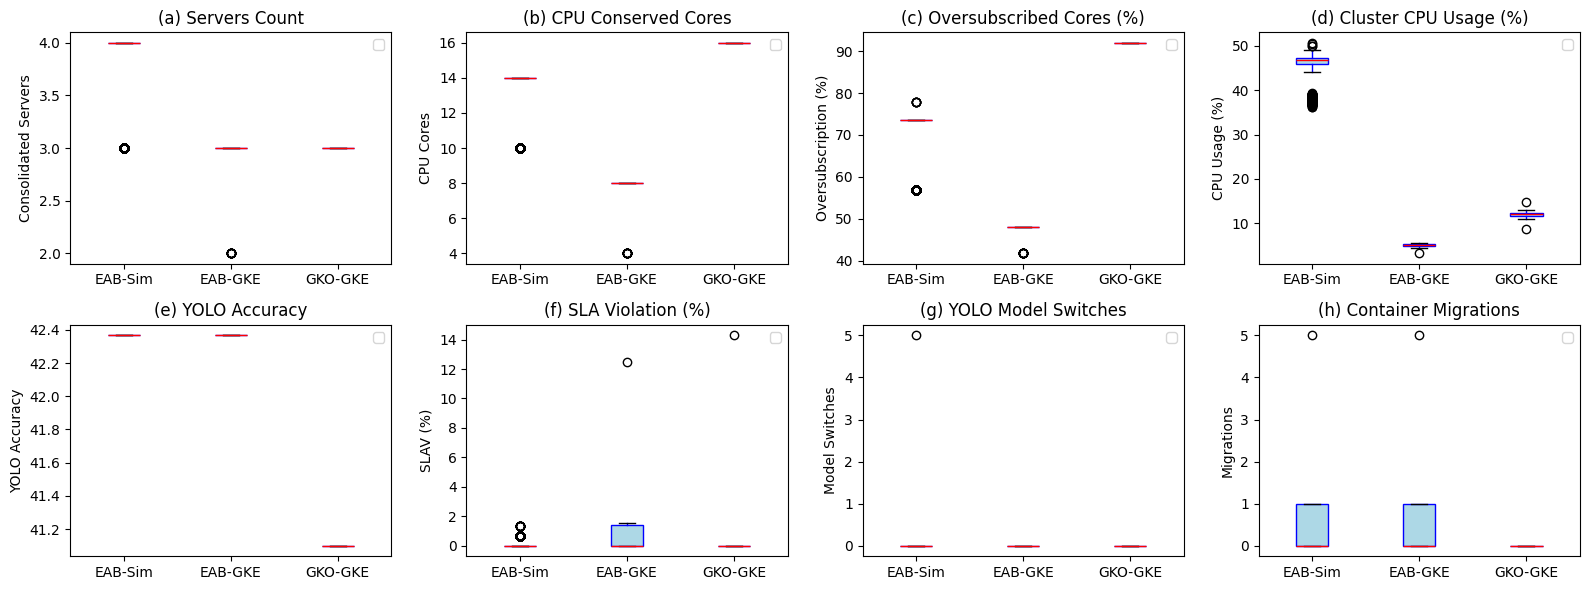

In [36]:
# Specify the columns to plot
columns_to_plot = [
    'num_consolidated', 
    'cpu_conserved_cost',
    'oversub_cores',
    'mean_cluster_cpu_util',
    'mean_accuracy',
    'num_slav',
    'num_model_switches',
    'num_moves'
]

# Create custom titles and labels
custom_titles = [
    '(a) Servers Count',
    '(b) CPU Conserved Cores',
    '(c) Oversubscribed Cores (%)',
    '(d) Cluster CPU Usage (%)',
    '(e) YOLO Accuracy',
    '(f) SLA Violation (%)',
    '(g) YOLO Model Switches',
    '(h) Container Migrations'
]

custom_y_labels = [
    'Consolidated Servers',
    'CPU Cores',
    'Oversubscription (%)',
    'CPU Usage (%)',
    'YOLO Accuracy',
    'SLAV (%)',
    'Model Switches',
    'Migrations'
]

custom_y_limits = [
    (0, 5),    # For 'num_consolidated'
    (0,18),     # For 'cpu_conserved_cost'
    (0, 130),    # For 'oversub_cores'
    (0, 100),    # For 'mean_cluster_cpu_util'
    (0, 55),    # For 'mean_accuracy'
    (0, 0.9),    # For 'num_slav'
    (0, 0.04),     # For 'num_model_switches'
    (0, 0.5)      # For 'num_moves'
]

custom_x_labels = [
    'EAB-Sim',
    'EAB-GKE',
    'GKO-GKE'
]

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(16, 6))  # 2 rows, 4 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()

columns_to_multiply = ['oversub_cores', 'mean_cluster_cpu_util', 'num_slav']

for i, column in enumerate(columns_to_plot):
    
    data_to_plot = [
        df6_sim[column] * (100 if column in columns_to_multiply else 1),
        df6eab_gke[column] * (100 if column in columns_to_multiply else 1),
        df6gko_gke[column] * (100 if column in columns_to_multiply else 1),
    ]
    
    axes[i].boxplot(
        data_to_plot,
        labels=custom_x_labels,  # Set x-tick labels
        patch_artist=True,  # Fill the boxes with color
        boxprops=dict(facecolor='lightblue', color='blue'),  # Box color
        medianprops=dict(color='red'),  # Median line color
        whiskerprops=dict(color='blue'),  # Whisker color
    )
    
     # Adding custom titles and labels
    axes[i].set_title(custom_titles[i])
    axes[i].set_ylabel(custom_y_labels[i])  # Set y-axis label
    #axes[i].set_ylim(custom_y_limits[i])  # Apply y-limits
    axes[i].legend()

# Adjust layout
plt.tight_layout()
#plt.savefig('testing_results.pdf', format='pdf')
plt.show()